In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv(r"C:\Users\KABEERJR\Desktop\internship program\sample\twitter_training.csv")
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


UNDESTANDING AND CLEANING THE DATA

In [29]:
data.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [30]:
Col_names=['ID','Entity','Sentiment','Message']
data=pd.read_csv(r"C:\Users\KABEERJR\Desktop\internship program\sample\twitter_training.csv", names=Col_names)

In [31]:
data.head(15)

,ID,Entity,Sentiment,Message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [32]:
data.nunique()

ID           12447
Entity          32
Sentiment        4
Message      69491
dtype: int64

In [33]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Message      686
dtype: int64

In [34]:
data.Message.fillna("Message not available",inplace=True)

In [35]:
data.info

<bound method DataFrame.info of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Message  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window

VISUALIZAING SENTIMENTAL DATA DISTRIBUTION

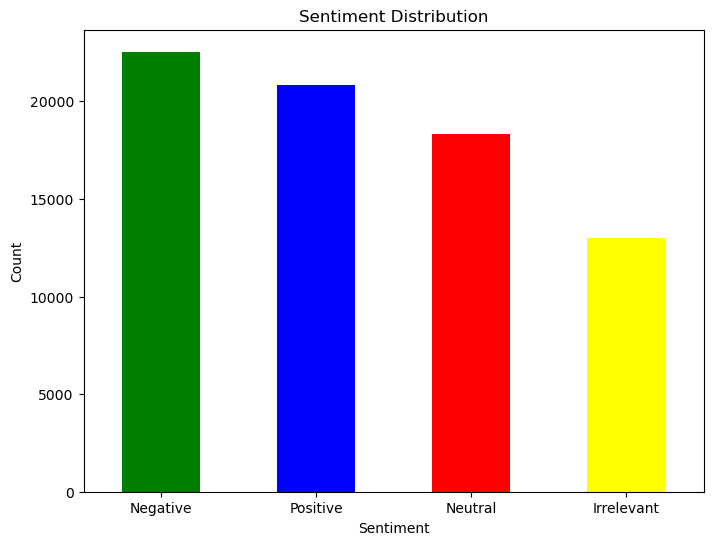

In [36]:
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

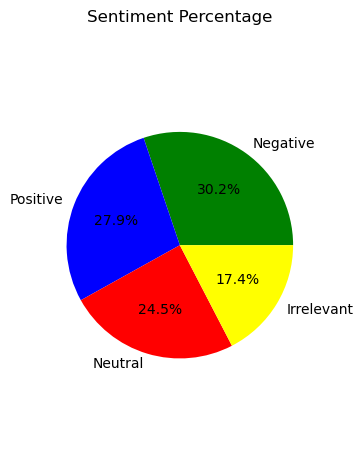

In [37]:
plt.subplot(1, 2, 2)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red','yellow'])
plt.title('Sentiment Percentage')
plt.axis('equal')

plt.tight_layout()
plt.show()


CREATING WORDCLOUD TO IDENTIFY THE TERMS USED IN MESSAGES 

In [38]:
!pip install wordcloud



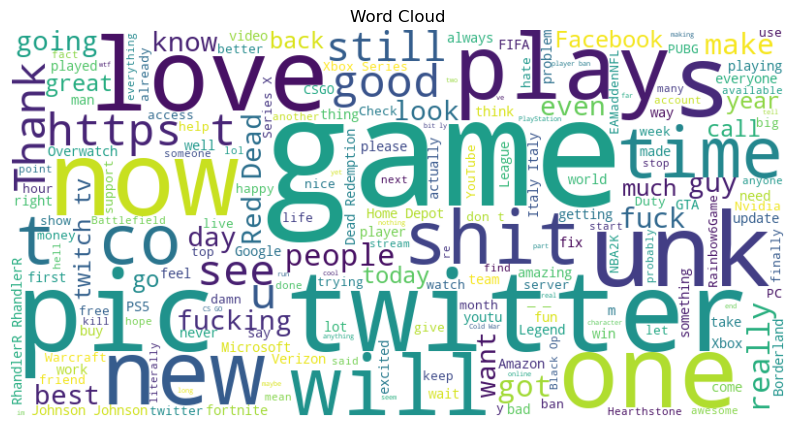

In [39]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Message']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()



LOGISTIC REGRESSION MODEL



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



# Perform Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vect, y_train)

y_pred = clf.predict(X_test_vect)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8409988618865903
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.88      0.77      0.82      2592
    Negative       0.86      0.87      0.87      4519
     Neutral       0.84      0.82      0.83      3596
    Positive       0.80      0.87      0.83      4230

    accuracy                           0.84     14937
   macro avg       0.85      0.83      0.84     14937
weighted avg       0.84      0.84      0.84     14937

Confusion Matrix:
[[1996  174  142  280]
 [  72 3945  198  304]
 [  89  225 2933  349]
 [ 103  240  199 3688]]




THANK YOU

